In [66]:
import pandas as pd
import numpy as np
# This file contains all required utilities to build resolvings sets and probabilistic methods
from Utils.resolving import *
from Utils.dataframes import *
from Utils.SVM  import SVC_model, dimension_reduction_by_PCA
from Utils.plots import plotting_PCA_SVC, averaging_plot


SENTI_DATA_PATH= "../Files/Full_Vader_Senti.txt"

In [2]:
#addition of tri tone cross contamination (no noise)

n = 350 # number of words in each dictionary (n for each tone)
lam = 30 # average sentence length
crossC3_fraction = .1 #the expected portion of the words in each sentnece that are from the opposite tone.
imported_vader_words = []
negative_vader_list = []
neutral_vader_list = []
positive_vader_list = []
acc_vec_crossC3 = []
acc_vec_crossC3_prime =[]

#reading in the words. Change the filepath to suit where yours is stored
x = open(SENTI_DATA_PATH, "r")
#e = r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed.txt"
for line in x:
    
    l = line.strip('\n')
    l = l.split("\t")
    imported_vader_words.append(l)
    
x.close()

for y in imported_vader_words : #sorting the words by tone
    if (-1<= float(y[1]) <= 1):
        neutral_vader_list.append(y[0]) 
    elif (float(y[1]) < -1):
        negative_vader_list.append(y[0])
    else :
        positive_vader_list.append(y[0])





shorten_pos = random.sample(positive_vader_list, n) #gets random n words w/out duplicates
shorten_neg = random.sample(negative_vader_list, n) #gets random n words w/out duplicates
shorten_neutral = random.sample(neutral_vader_list, n) #gets random n words w/out duplicates


negative_sent_list = []
for i in range(0,500):
    h = np.random.poisson(lam=lam - 2*lam*crossC3_fraction, size=None)
    k = np.random.poisson(lam= lam*crossC3_fraction, size=None)
    j = np.random.poisson(lam= lam*crossC3_fraction, size=None)
    negative_sent_list.append(random.sample(shorten_neg, h) +random.sample(shorten_pos, k) + random.sample(shorten_neutral,j))

positive_sent_list = []
for i in range(0,500):
    #changes so poisson is still same mean with addition
    h = np.random.poisson(lam=lam - 2*lam*crossC3_fraction, size=None)
    k = np.random.poisson(lam= lam*crossC3_fraction, size=None)
    j = np.random.poisson(lam= lam*crossC3_fraction, size=None)
    positive_sent_list.append(random.sample(shorten_pos, h)+random.sample(shorten_neg, k) + random.sample(shorten_neutral,j))

neutral_sent_list = []
for i in range(0,500):
    #changes so poisson is still same mean with addition
    h = np.random.poisson(lam=lam - 2*lam*crossC3_fraction, size=None)
    k = np.random.poisson(lam= lam*crossC3_fraction, size=None)
    j = np.random.poisson(lam= lam*crossC3_fraction, size=None)
    neutral_sent_list.append(random.sample(shorten_neutral,h)+random.sample(shorten_pos, k)+random.sample(shorten_neg, j))




final_list = negative_sent_list + positive_sent_list + neutral_sent_list

#getting wordlist 
wordlist_crossC3 = {x for l in final_list for x in l}
wordlist_crossC3_prime = {x for l in final_list for x in l}

#generating resolving set. note that the "prime" is for the compliment resolving set, and can be deleted if you don't want to deal with that
resolving_crossC3 = Random_Resolving_Set((shorten_pos+shorten_neg+shorten_neutral).copy())
resolving_crossC3_prime = Random_Resolving_Set(shorten_pos) + Random_Resolving_Set(shorten_neg) + Random_Resolving_Set(shorten_neutral)# + #Random_Resolving_Set(shorten_neutral)
print(len(resolving_crossC3))

#generating the Jaccard Matrices
JacMatrix_crossC3 = JVecEMatrix(resolving_crossC3,final_list)
JacMatrix_crossC3_prime = JVecEMatrix(resolving_crossC3_prime,final_list)

labeled_dic_crossC3 = {}
labeled_dic_crossC3_prime = {}

#this just stores all the vectors of the Jmatrix in a dictionary with key vec, and tone corresponding to its tone. 
for i in range(0,len(JacMatrix_crossC3)):
    if (i<500):
        labeled_dic_crossC3[i] = {'vec': JacMatrix_crossC3[i], 'tone': "negative"}
    elif (500<i<1000):
        labeled_dic_crossC3[i] = {'vec': JacMatrix_crossC3[i], 'tone': "positive"}
    else:
        labeled_dic_crossC3[i] = {'vec': JacMatrix_crossC3[i], 'tone': "neutral"} #for now this never triggers, but could for tri tone cross contam


for i in range(0,len(JacMatrix_crossC3_prime)):
    if (i<500):
        labeled_dic_crossC3_prime[i] = {'vec': JacMatrix_crossC3_prime[i], 'tone': "negative"}
    elif (500<i<1000):
        labeled_dic_crossC3_prime[i] = {'vec': JacMatrix_crossC3_prime[i], 'tone': "positive"}
    else:
        labeled_dic_crossC3_prime[i] = {'vec': JacMatrix_crossC3_prime[i], 'tone': "neutral"}#for now this never triggers, but could for tri tone cross contam
        
cross_df, tones = Dict_to_df(labeled_dic_crossC3); 

332


In [3]:
tones = Category_encode(tones)

In [4]:
SVC_model(cross_df, tones)

0.31777777777777777

In [123]:
#addition of cross contamination 
#############################################
#
#Param: n := number of words in each dictionary (n for each tone) 
#       lam := average sentence length
#       crossC_fraction := the expected portion of the words in each sentnece that are from the opposite tone.
#
#
#############################################
def generate_cross_contaminated_v1(n = 350, lam = 50, crossC_fraction = 0.01):
    
    imported_vader_words = []
    negative_vader_list = []
    neutral_vader_list = []
    positive_vader_list = []
    
    #reading in the words. Change the filepath to suit where yours is stored
    x = open(SENTI_DATA_PATH, "r")
    #e = r"C:\Users\ajpar\Desktop\Research Documents\Project Coding\Full_Tweet_List_Processed.txt"
    for line in x:
        
        l = line.strip('\n')
        l = l.split("\t")
        imported_vader_words.append(l)
        
    x.close()

    for y in imported_vader_words : #sorting the words by tone
        if (-1<= float(y[1]) <= 1):
            neutral_vader_list.append(y[0]) 
        elif (float(y[1]) < -1):
            negative_vader_list.append(y[0])
        else :
            positive_vader_list.append(y[0])
    print(lam * crossC_fraction)

    shorten_pos = random.sample(positive_vader_list, n) #gets random n words w/out duplicates
    shorten_neg = random.sample(negative_vader_list, n) #gets random n words w/out duplicates
    shorten_neutral = random.sample(neutral_vader_list, n) #gets random n words w/out duplicates

    negative_sent_list = []
    for i in range(0,500):
        h = np.random.poisson(lam=lam - 2*lam*crossC_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC_fraction, size=None)
        j = np.random.poisson(lam = lam*crossC_fraction, size = None)
        negative_sent_list.append(random.sample(shorten_neg, h) +random.sample(shorten_pos, k) + random.sample(shorten_neutral, j))

    positive_sent_list = []
    for i in range(0,500):
        h = np.random.poisson(lam=lam - 2*lam*crossC_fraction, size=None)
        k = np.random.poisson(lam= lam*crossC_fraction, size=None)
        j = np.random.poisson(lam = lam*crossC_fraction, size = None)
        positive_sent_list.append(random.sample(shorten_pos, h)+random.sample(shorten_neg, k) + random.sample(shorten_neutral, j))

    
    neutral_sent_list = []
    for i in range(0, 500): 
        h = np.random.poisson(lam= lam - 2*crossC_fraction, size = None)
        k = np.random.poisson(lam= lam*crossC_fraction, size = None)
        j = np.random.poisson(lam= lam*crossC_fraction, size = None)
        neutral_sent_list.append(random.sample(shorten_neutral, h) + random.sample(shorten_pos, k) + random.sample(shorten_neg, j))


    final_list = negative_sent_list + positive_sent_list + neutral_sent_list

    #getting wordlist 
    wordlist_crossC = {x for l in final_list for x in l}
    wordlist_crossC_prime = {x for l in final_list for x in l}

    #generating resolving set. note that the "prime" is for the compliment resolving set, and can be deleted if you don't want to deal with that
    resolving_crossC = Random_Resolving_Set(wordlist_crossC)
    resolving_crossC_prime = Random_Resolving_Set_Compliment(wordlist_crossC_prime)

    print(len(resolving_crossC))
    #generating the Jaccard Matrices
    JacMatrix_crossC = JVecEMatrix(resolving_crossC,final_list)
    JacMatrix_crossC_prime = JVecEMatrix(resolving_crossC_prime,final_list)

    labeled_dic_crossC = {}
    labeled_dic_crossC_prime = {}

    #this just stores all the vectors of the Jmatrix in a dictionary with key vec, and tone corresponding to its tone. 
    for i in range(0,len(JacMatrix_crossC)):
        if (i<500):
            labeled_dic_crossC[i] = {'vec': JacMatrix_crossC[i], 'tone': "negative"}
        elif (500<i<1000):
            labeled_dic_crossC[i] = {'vec': JacMatrix_crossC[i], 'tone': "positive"}
        else:
            labeled_dic_crossC[i] = {'vec': JacMatrix_crossC[i], 'tone': "neutral"} #for now this never triggers, but could for tri tone cross contam


    for i in range(0,len(JacMatrix_crossC_prime)):
        if (i<500):
            labeled_dic_crossC_prime[i] = {'vec': JacMatrix_crossC_prime[i], 'tone': "negative"}
        elif (500<i<1000):
            labeled_dic_crossC_prime[i] = {'vec': JacMatrix_crossC_prime[i], 'tone': "positive"}
        else:
            labeled_dic_crossC_prime[i] = {'vec': JacMatrix_crossC_prime[i], 'tone': "neutral"}#for now this never triggers, but could for tri tone cross contam
            
    return Dict_to_df(labeled_dic_crossC); 

In [124]:
df, tone = generate_cross_contaminated_v1(n = 550, crossC_fraction=0)
tones = Category_encode(tone)

0
489


In [121]:
SVC_model(df, tones)

0.7155555555555555

0.7355555555555555


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


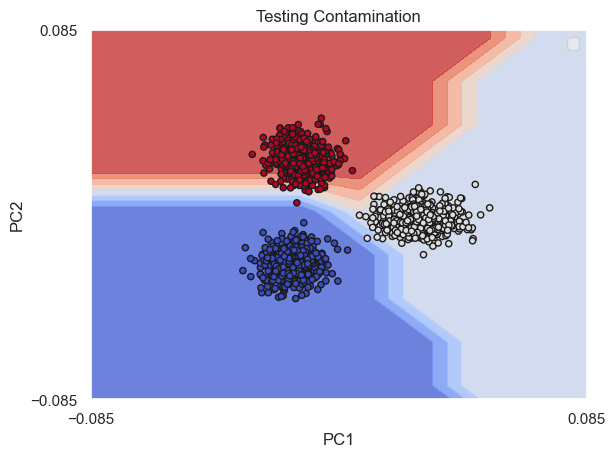

In [122]:
X_test = df.to_numpy()
Y_label = tones.to_numpy()

# SVC_model imported from Utils.SVM
pca_X = dimension_reduction_by_PCA(X_test, 4)

print(SVC_model(pca_X, tones))
plotting_PCA_SVC(pca_X, Y_label, first_c = 1, second_c = 2, title= "Testing Contamination")

In [88]:
accuracy_list = []

for i in range(0, 10): 
    df, tone = generate_cross_contaminated_v1(n = 750, crossC_fraction=0.1)
    tones = Category_encode(tone)
    
    X_test = df.to_numpy()
    Y_label = tones.to_numpy()
    
    accuracy_list.append(SVC_model(X_test, Y_label))

    

In [89]:
acc = np.array(accuracy_list).T
accuracy_df = pd.DataFrame(acc, columns=["10%"])

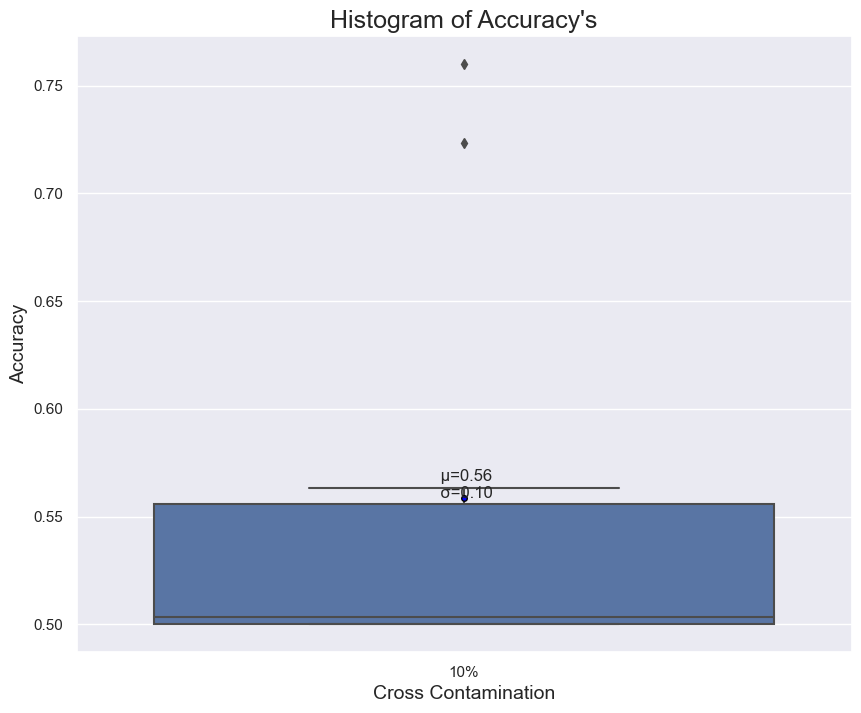

In [90]:
import matplotlib.pyplot as plt
averaging_plot(accuracy_df, x_label="Cross Contamination", title = "Histogram of Accuracy's")
plt.savefig('n=750')